# DATA ANALYSIS PROJECT
---
# Analyzing Fitness Patterns and Predicting Calorie Expenditure for Gym Members

---

**Objectives:**

**1.	Analyze Patterns in Gym Members' Fitness Habits:**

*	Understand how demographic factors (e.g., age, gender) influence workout preferences and intensity.

*	Explore the relationship between workout type, duration, and calorie expenditure.

**2.	Predict Calorie Burn:**

*	Build a predictive model to estimate calories burned based on workout parameters and physiological metrics (e.g., BMI, heart rate).

**3.	Insights for Health and Fitness Recommendations:**

*	Identify the factors most associated with higher fitness levels and efficient calorie burn.

*	Provide actionable recommendations for gym-goers based on their experience levels.


# **1. Importing Data**

Steps:
*   Load the dataset into Python using pandas found from Kaggle.
*   Importing each library used for the project.
*   Inspecting the data to understand the structure, data types, and summary statistics.


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

path = "/content/gym_members_exercise_tracking.csv"

gym_data = pd.read_csv(path)

# Info for the columns, number of rows and data types
gym_data.info()

print()
print()

# Generate descriptive statistics
gym_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


# **2. Data Cleaning**








# **2.1.   Handle Missing Values:**
*   Identify missing or null values using gym_data.isnull().sum() and gym_data.isna().sum().
*   Impute or drop missing data (e.g., mean imputation for numerical columns, mode for categorical ones).

In [31]:
print("Check for null values:")
print(gym_data.isnull().sum())

# Handling null values by replacing them with mean
gym_data['Calories_Burned'] = gym_data['Calories_Burned'].fillna(gym_data['Calories_Burned'].mean())

print()
print()

print("Check for NaN values in the entire DataFrame:")
print (gym_data.isna().sum())

Check for null values:
Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64


Check for NaN values in the entire DataFrame:
Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_

# **2.2 Detect and "Handle" Outliers**


*   This code is used to detect and handle outliers in the Calories_Burned column of the gym_data DataFrame, using the Interquartile Range (IQR) method.




In [48]:
# Detect outliers using IQR for Calories_Burned
Q1 = gym_data['Calories_Burned'].quantile(0.25)
Q3 = gym_data['Calories_Burned'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = gym_data[(gym_data['Calories_Burned'] < Q1 - 1.5 * IQR) | (gym_data['Calories_Burned'] > Q3 + 1.5 * IQR)]

# Capping or removing outliers
gym_data['Calories_Burned'] = gym_data['Calories_Burned'].clip(lower=Q1 - 1.5 * IQR, upper=Q3 + 1.5 * IQR)
print(f"Number of outliers detected: {len(outliers)}")


Number of outliers detected: 0


# **2.3. Standardize or Format Categorical Variables**

*   Ensuring categorical variables like Workout_Type and Gender are clean and consistent:


In [33]:
# Correct typos or inconsistencies
gym_data['Workout_Type'] = gym_data['Workout_Type'].str.strip().str.capitalize()
gym_data['Gender'] = gym_data['Gender'].str.strip().str.capitalize()

# Check unique values after cleaning
print(gym_data['Workout_Type'].unique())
print(gym_data['Gender'].unique())

['Yoga' 'Hiit' 'Cardio' 'Strength']
['Male' 'Female']


# **2.4. Convert Units or Rename Columns**

* Converting units to minutes and renaming column for better consistency:

In [34]:
# Convert session duration from hours to minutes
gym_data['Session_Duration (minutes)'] = gym_data['Session_Duration (hours)'] * 60

# Drop the old column for cleanliness
gym_data.drop('Session_Duration (hours)', axis=1, inplace=True)


# **2.5. Feature Engineering**

* Adding new features, such as BMI and Experience_Level categories:

In [35]:
# Define BMI category classification
def classify_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obese'

# Apply classification to BMI column
gym_data['BMI_Category'] = gym_data['BMI'].apply(classify_bmi)

# Check the new column
print(gym_data[['BMI', 'BMI_Category']].head())


     BMI BMI_Category
0  30.20        Obese
1  32.00        Obese
2  24.71       Normal
3  18.41  Underweight
4  14.39  Underweight


**Label Encoding for Experience_Level**

* The values [3, 2, 1] indicate the column is already numeric. Therefore, no need to remap the column unless these numbers don’t align with the semantic meanings (3 = Expert, 2 = Intermediate, 1 = Beginner).

In [36]:
print(gym_data['Workout_Type'].unique())
print(gym_data['Experience_Level'].unique())

['Yoga' 'Hiit' 'Cardio' 'Strength']
[3 2 1]


In [37]:
# Map the numerical Experience_Level back to categorical labels
experience_map = {1: 'Beginner', 2: 'Intermediate', 3: 'Expert'}
gym_data['Experience_Level'] = gym_data['Experience_Level'].map(experience_map)

# Verify the mapping worked
print(gym_data['Experience_Level'].unique())  # ['Expert', 'Intermediate', 'Beginner']


['Expert' 'Intermediate' 'Beginner']


**"One-Hot" Encoding for Workout_Type**

* Since the column is clean, the encoding step will directly create new binary columns for each workout type (except the first one, which is dropped to avoid multicollinearity).

In [38]:
gym_data = pd.get_dummies(gym_data, columns=['Workout_Type'], drop_first=True)

# **2.6. Check for Duplicates**

Duplicates can skew analysis if the same information is counted multiple times.

In [39]:
# Check for duplicate rows
duplicates = gym_data.duplicated()

# Count and optionally remove duplicates
print(f"Number of duplicate rows: {duplicates.sum()}")
gym_data.drop_duplicates(inplace=True)

Number of duplicate rows: 0


# **2.7. Verify Data Types**

* This section focuses on ensuring that the data in the gym_data DataFrame has the correct data types for analysis.
(e.g., numerical, categorical).

In [40]:
print(gym_data.dtypes)

# Convert data types if necessary
# gym_data['Age'] = gym_data['Age'].astype(int)
# gym_data['Session_Duration (minutes)'] = gym_data['Session_Duration (minutes)'].astype(float)

Age                                int64
Gender                            object
Weight (kg)                      float64
Height (m)                       float64
Max_BPM                            int64
Avg_BPM                            int64
Resting_BPM                        int64
Calories_Burned                  float64
Fat_Percentage                   float64
Water_Intake (liters)            float64
Workout_Frequency (days/week)      int64
Experience_Level                  object
BMI                              float64
Session_Duration (minutes)       float64
BMI_Category                      object
Workout_Type_Hiit                   bool
Workout_Type_Strength               bool
Workout_Type_Yoga                   bool
dtype: object


# **2.8. Check Data Consistency**

* Ensure logical consistency between columns (e.g., Calories_Burned should be proportional to Session_Duration).

In [41]:
# Example check: Ensure no negative values
assert (gym_data['Calories_Burned'] >= 0).all(), "Negative values found in Calories_Burned"

# **2.9. Save the Clean Data**

* After completing the data cleaning steps, it's crucial to save the cleaned dataset to a new file.
* This ensures that the cleaned data is preserved and readily available for further analysis and modeling.
* Saving the data prevents you from having to repeat the cleaning process each time you work with the dataset.

**Benefits of Saving Cleaned Data:**

* Preservation: Ensures that the cleaned data is stored separately from the original data, preventing accidental modifications to the cleaned version.
* Efficiency: Eliminates the need to repeat the data cleaning process each time you need to work with the data.
* Reproducibility: Allows others to easily access and use the cleaned data, promoting reproducibility of your analysis.
* Data Management: Facilitates better organization and management of your data files.

In [49]:
gym_data.to_csv('gym_data_cleaned.csv', index=False)

# **3. Perform Descriptive Statistics**

# 3.1. Perform Descriptive Statistics
* Descriptive statistics provide a summary of the dataset, which helps understand the basic properties of the data such as central tendency, spread, and relationships between variables.

**Steps:**
* Mean, Median, Mode: These are measures of central tendency.
* Standard Deviation: Measures the spread or variability in the data.
* Correlation Matrix: Helps you understand relationships between numerical features.

In [52]:
# Perform Descriptive Statistics
def descriptive_stats_report(data):

    numeric_columns = data.select_dtypes(include=['float64', 'int64'])

    # Transpose the describe() output for better readability
    descriptive_stats = numeric_columns.describe().T

    # Add mode to the descriptive statistics table
    descriptive_stats['mode'] = numeric_columns.mode().iloc[0]

    # Rename columns for clarity
    descriptive_stats = descriptive_stats.rename(columns={
        'count': 'Count',
        'mean': 'Mean',
        'std': 'Standard Deviation',
        'min': 'Minimum',
        '25%': '25th Percentile',
        '50%': 'Median',
        '75%': '75th Percentile',
        'max': 'Maximum',
        'mode': 'Mode'
    })

    # Print the formatted descriptive statistics
    print("Descriptive Statistics:")
    print(descriptive_stats.to_string())  # to_string() for better formatting

    print()

    # Print the correlation matrix
    correlation_matrix = numeric_columns.corr()
    print("\nCorrelation Matrix:")
    print(correlation_matrix.to_string())  # to_string() for better formatting

# Call the function with your data
descriptive_stats_report(gym_data)

Descriptive Statistics:
                               Count        Mean  Standard Deviation  Minimum  25th Percentile  Median  75th Percentile  Maximum     Mode
Age                            973.0   38.683453           12.180928    18.00            28.00   40.00            49.00    59.00    43.00
Weight (kg)                    973.0   73.854676           21.207500    40.00            58.10   70.00            86.00   129.90    57.70
Height (m)                     973.0    1.722580            0.127720     1.50             1.62    1.71             1.80     2.00     1.62
Max_BPM                        973.0  179.883864           11.525686   160.00           170.00  180.00           190.00   199.00   198.00
Avg_BPM                        973.0  143.766701           14.345101   120.00           131.00  143.00           156.00   169.00   132.00
Resting_BPM                    973.0   62.223022            7.327060    50.00            56.00   62.00            68.00    74.00    50.00
Calories_B

# Visualizing the correlation matrix using a heatmap

**Identify Strong Relationships:**

* Quickly spot variables that are strongly correlated and may have predictive or dependent relationships.
For example, you might see that Calories_Burned has a strong positive correlation with Session_Duration.

**Detect Multicollinearity:**

* Variables that are highly correlated with each other (e.g., Weight and BMI) can cause issues in predictive models like regression.
If multicollinearity exists, you might decide to remove or combine those variables.

**Understand Patterns:**

* Helps to uncover hidden relationships or redundancies in the data.

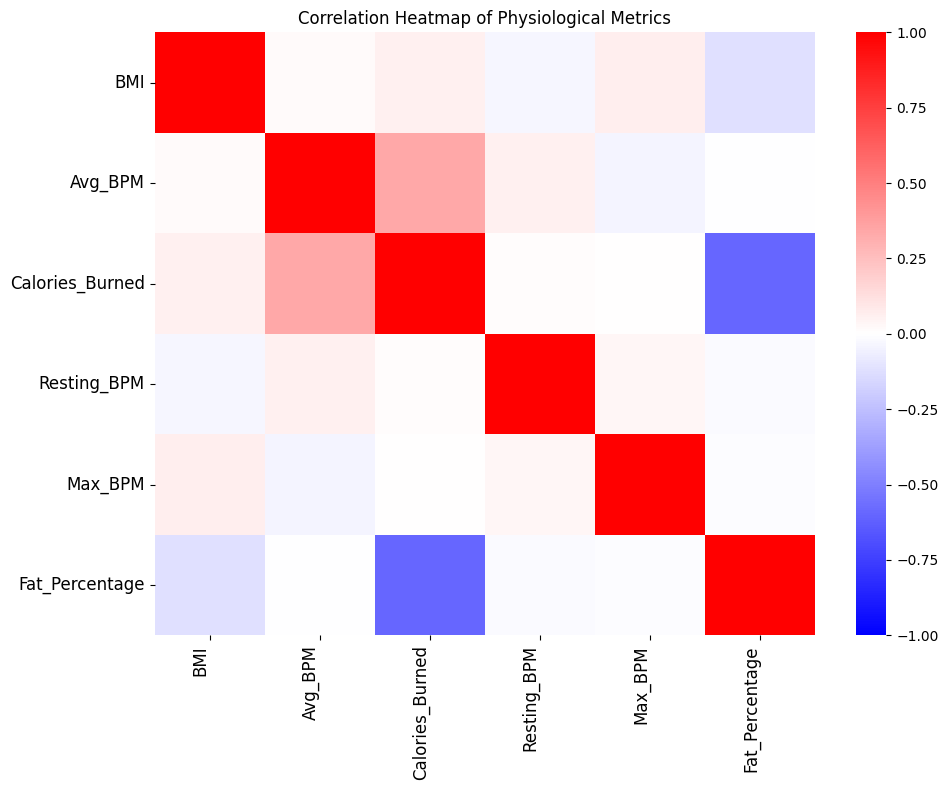

In [44]:
# Select physiological metrics for the heatmap
physio_metrics = gym_data[['BMI', 'Avg_BPM', 'Calories_Burned', 'Resting_BPM', 'Max_BPM', 'Fat_Percentage']]

# Create a correlation heatmap with enhanced column and row visibility
plt.figure(figsize=(10, 8))
sns.heatmap(physio_metrics.corr(), annot=False, cmap='bwr', center=0, vmin=-1, vmax=1)

# Enhance column and row labels
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.title("Correlation Heatmap of Physiological Metrics")
plt.tight_layout()

# **3.2. Segment Data by Gender**

**Interpretation of the Graph**

Gender Proportions: The pie chart visually displays the relative proportions of different genders in the dataset. By comparing the slice sizes, you can quickly assess which gender is more or less represented in the gym member data.

Dominant Gender: The largest slice indicates the dominant gender among gym members. For instance, if the "Male" slice is significantly larger than the "Female" slice, it suggests that there are more male gym members in the dataset.

Overall Distribution: The pie chart provides an overall picture of the gender distribution within the gym member population. This information can be useful for understanding the demographics of the gym and tailoring services or programs accordingly.

**Example Interpretation**

Let's say the pie chart shows the following:

Male: 60%
Female: 40%
Based on this, we can interpret that:

60% of the gym members in the dataset are male.
40% of the gym members in the dataset are female.
There are more male gym members than female gym members in the dataset.
Further Considerations

Representativeness: It's important to consider whether the dataset used to create the pie chart is representative of the broader gym member population. If the dataset is biased or incomplete, the pie chart may not accurately reflect the actual gender distribution.
Context: The interpretation of the pie chart should be considered within the specific context of the gym and its target audience. For instance, a gym located in a predominantly male area might naturally have a higher proportion of male members.


Segmented Data by Gender (Numeric Columns):
              Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
Gender                                                               
Female  38.335498    60.939827    1.644242  179.759740  143.621212   
Male    38.998043    85.531115    1.793405  179.996086  143.898239   

        Resting_BPM  Calories_Burned  Fat_Percentage  Water_Intake (liters)  \
Gender                                                                        
Female    62.114719       862.216450       27.656710               2.205411   
Male      62.320939       942.988258       22.553816               3.007436   

        Workout_Frequency (days/week)        BMI  Session_Duration (minutes)  
Gender                                                                        
Female                       3.339827  22.727835                   75.649351  
Male                         3.305284  26.886967                   75.146771  


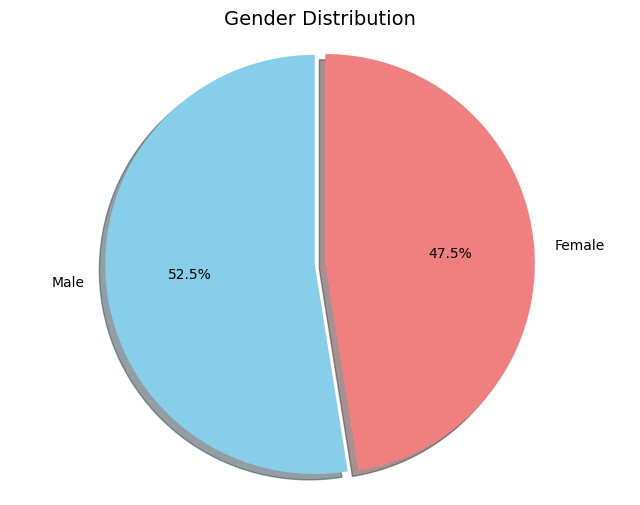

In [45]:
# Segment data by Gender and get the mean for each group
# Include 'Gender' column in the selection
gender_segment = gym_data[['Gender'] + gym_data.select_dtypes(include=np.number).columns.tolist()].groupby('Gender').mean()

# Show the results
print("\nSegmented Data by Gender (Numeric Columns):")
print(gender_segment)

# Gender Distribution Pie Chart (unchanged)
gender_count = gym_data['Gender'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=90,
        colors=['skyblue', 'lightcoral'], explode=[0.05, 0], shadow=True)
plt.title('Gender Distribution', fontsize=14)
plt.axis('equal')
plt.show()

# **3.3. Box plot for Calories_Burned by Experience_Level**

**Overall Insights**

* The box plot provides evidence that experience level is likely associated with calorie burn during workouts. More experienced gym-goers ("Expert") tend to burn more calories on average compared to less experienced individuals ("Beginner" and "Intermediate"). However, there is variability within each group, and some outliers deviate from the general trend.

**Further Considerations**

* It's important to remember that this is an observational study, so we cannot establish causality between experience level and calorie burn. Other factors not captured in the data could be contributing to the observed differences.
Further analysis, such as statistical tests, would be needed to confirm the significance of these relationships.
The presence of outliers suggests that individual factors may also play a role in calorie expenditure during workouts.

<ipython-input-46-cfd5a09039c8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=gym_data, x='Experience_Level', y='Calories_Burned', palette="pastel",


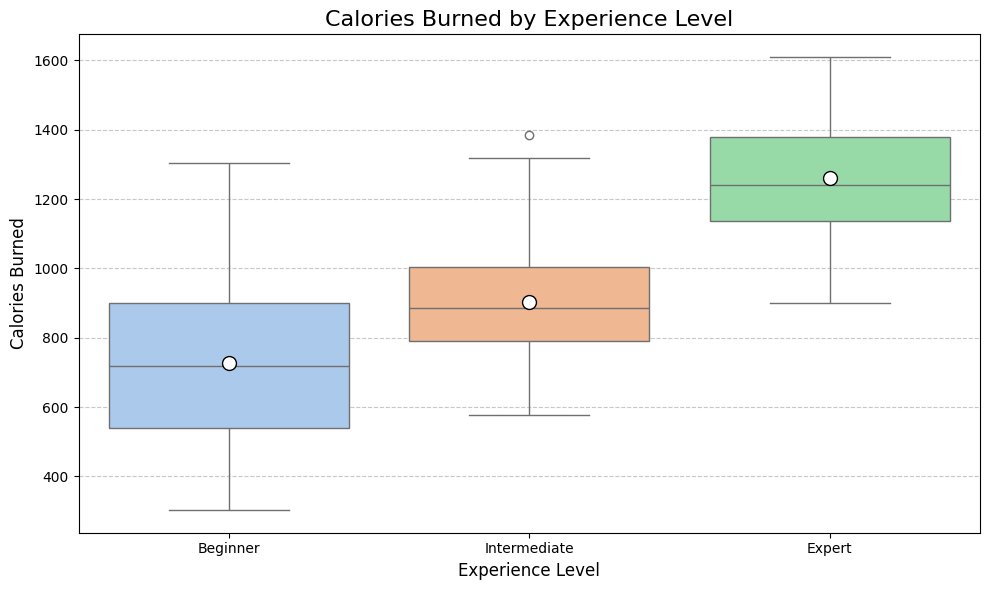

In [46]:
# Enhanced Box plot for Calories_Burned by Experience_Level, ordered from Beginner to Expert
plt.figure(figsize=(10, 6))
sns.boxplot(data=gym_data, x='Experience_Level', y='Calories_Burned', palette="pastel",
            showmeans=True, meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"10"},
            order=['Beginner', 'Intermediate', 'Expert'])  # Specify order
plt.title('Calories Burned by Experience Level', fontsize=16)
plt.xlabel('Experience Level', fontsize=12)
plt.ylabel('Calories Burned', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()